In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS


%matplotlib inline
import matplotlib.pyplot as plt

#from IPython.display import Image
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.show()

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
import sys, os
from deepiu.util.text_predictor import TextPredictor
from deepiu.util.sim_predictor import SimPredictor
from deepiu.util import text2ids
import melt, gezi
import numpy as np 
import traceback

try:
  import conf
  from conf import TEXT_MAX_WORDS
except Exception:
  from deepiu.image_caption.conf import TEXT_MAX_WORDS

image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'

image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt'

#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.baseline'
model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.idf'
vocab_path = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt'
valid_dir = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/valid'


image_model_name = melt.get_imagenet_from_checkpoint(image_model_checkpoint_path).name
image_model = None
if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, 
                                      feature_name='attention')
  
    
print('image_model:', image_model)

text2ids.init(vocab_path)
vocab = text2ids.vocab

predictor = SimPredictor(model_dir,  
                         image_model=image_model,
                         index=-1)

text_strs = np.load(os.path.join(valid_dir, 'distinct_text_strs.npy'))
img2text = np.load(os.path.join(valid_dir, 'img2text.npy')).item()

tensorflow_version: 1.4.0-rc1


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


checkpoint /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt model_name InceptionResnetV2 height 299 width 299
build graph for final one feature
preprocessing_fn net_name inception_resnet_v2 height 299 width 299


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


image_model will get feature_name Conv2d_7b_1x1
image_feature: Tensor("Flatten/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
build graph for attention features
preprocessing_fn net_name inception_resnet_v2 height 299 width 299
image_model will get feature_name Conv2d_7b_1x1
image_feature: Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
in create_image_model_init_fn image_model_name InceptionResnetV2 moving_average_decay None


INFO:tensorflow:Restoring parameters from /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt
image_model: <melt.image.image_model.ImageModel object at 0x7efcdb7eec50>
INFO:tensorflow:Initializing vocabulary from file: /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt
INFO:tensorflow:Created vocabulary with 10148 words


restore image var from InceptionResnetV2 /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt duration: 5.62147116661
ENCODE_UNK 1
load frozen graph from /home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.idf/model.ckpt-8.54-7000.pb with mapfile /home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.idf/model.ckpt-8.54-7000.map duration: 1.19868612289


image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 7d4c31622068faa535e74cd6fe176559e31f0276


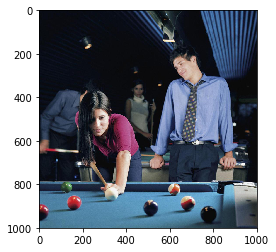

topwords of image:
摘瓜 0.773427|擦枪 0.764571|台球桌 0.752765|打斯 0.742765|巧粉 0.716256|刚出生 0.688509|台球 0.688037|桌球 0.665864|凑 0.652383|一个打 0.633522|跃 0.629619|面部 0.623425|夜幕 0.613074|蜘蛛 0.611736|太阳能 0.600549|进网 0.598974|乒 0.59416|晴空万里 0.584236|长相 0.582556|昏暗 0.563538|长衣 0.557101|波浪翻滚 0.554872|铲除 0.554521|绿莹莹 0.543859|彩色 0.542604|梁 0.530261|烤鱼 0.51923|马头 0.518669|半明半暗 0.518066|全 0.515651|二十 0.51175|铁丝 0.505946|窗帘 0.497846|模特 0.497778|相间 0.492052|撑头 0.488688|囊 0.484716|狐狸 0.484365|地窖 0.483978|浊 0.48141|鹤 0.481074|跳跳 0.479585|黑暗 0.476918|前弹 0.476008|肢 0.475561|蚝 0.471348|明净 0.468372|击 0.466855|弥 0.465773|骑驴 0.464915|连体服 0.464262|踹 0.464093|繁花似锦 0.463858|蜜 0.462374|塑料盒 0.461905|联 0.460283|袋装 0.459772|面露 0.457301|放羊 0.456725|车载 0.451649|洛克 0.448344|外切 0.448228|如意 0.447557|台球厅 0.446591|袜 0.44377|桌旁 0.443591|夜空 0.442462|坎 0.442391|花站 0.44115|丁 0.440401|犁 0.435598|暗淡 0.434729|兔子 0.433931|有 0.433495|费 0.432649|帘子 0.43235|玩滑 0.432066|向前走 0.429428|命 0.428851|鲸 0.42197|亮亮堂堂 0.420011|鸬鹚 0.419666|见 0.41905

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.353 seconds.
Prefix dict has been built succesfully.


<UNK>
sim: [ 0.06146976]
text(q for exit): 
image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 0aa9bd2851ea3cb45d99247ae9d9e7185036474c


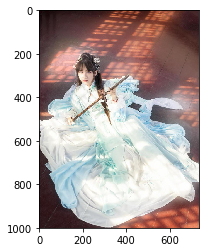

topwords of image:
棍子 0.578426|凑 0.572071|二胡 0.564951|剑 0.548548|蜘蛛 0.54122|舞台 0.530761|夜幕 0.512292|婚纱 0.484776|昏暗 0.449784|袋子 0.449751|长衣 0.449359|梁 0.44915|小提琴 0.448028|见 0.447133|木棍 0.443803|杆子 0.443634|马头 0.442244|垃圾 0.437649|美轮美奂 0.437447|台球厅 0.436844|袍 0.43535|黑暗 0.432146|演奏 0.428087|页 0.42706|地窖 0.42705|灯 0.42583|袋装 0.424972|一个打 0.424245|夜空 0.424035|长杆 0.423268|陈旧 0.416928|光鲜亮丽 0.415073|照着 0.411968|旁拉 0.411498|麻袋 0.411241|鹤 0.411005|半明半暗 0.407879|围绕 0.403437|人盘 0.401698|锈 0.40087|上拉 0.400542|道具 0.399278|烟枪 0.399132|武器 0.398482|一袋 0.398374|棒 0.397666|拾 0.397546|模特 0.396288|刀 0.393968|一根 0.393896|花束 0.391171|新人 0.389056|横抱 0.387582|打着 0.386976|花 0.386666|民族服饰 0.38624|唱着歌 0.386182|做术 0.385443|灰暗 0.384042|拉琴 0.383582|棒子 0.382405|拂尘 0.381446|击 0.380617|闪耀 0.37905|摘瓜 0.37566|塑料袋 0.371521|钉耙 0.371351|女模特 0.370947|假 0.370379|拐杖 0.368642|造型 0.367329|乐器 0.365813|暗淡 0.36544|绚丽 0.364933|鱼竿 0.364868|拍杆 0.36466|拿烟 0.364623|自 0.363746|耙子 0.363656|长枪 0.362134|前卫 0.361735|绳子 0.360601|泛黄 0.36055|

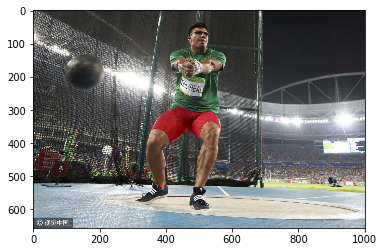

topwords of image:
链球 0.658758|道路 0.603457|终点 0.594123|背站 0.566361|赛跑 0.561565|跑道 0.553964|倒立 0.544664|起跑 0.538051|兴高采烈 0.530886|阳光明媚 0.526252|照射 0.517122|赛道 0.514886|斑马线 0.505235|立 0.504639|一个打 0.500359|杂技 0.498558|蜘蛛 0.498535|擂台 0.493232|塑胶跑道 0.489337|操场上 0.488733|踏 0.484635|跑步 0.482341|打拳 0.47953|凑 0.477778|肌肉 0.477679|拳套 0.474849|阳光灿烂 0.474491|锻炼 0.470486|靶 0.46903|动作 0.468395|巴士 0.466691|表演 0.46622|连体衣 0.459632|夜幕 0.453552|铁杆 0.452286|宝 0.447519|扛着 0.447224|跳 0.446687|拳击 0.446654|点地 0.442787|平坦 0.442479|冰刀鞋 0.442346|洒 0.442175|洒满 0.441627|比赛服 0.441132|鞋子 0.439983|标枪 0.439551|腾空 0.438023|走 0.437097|设备齐全 0.435954|乒 0.435537|路旁 0.434149|车尾 0.43374|击 0.433091|举着 0.432487|跃起 0.431293|单杠 0.429418|高跟鞋 0.428771|事故现场 0.428698|铅球 0.428338|地窖 0.427118|场地 0.425678|左脚 0.424392|曲折 0.423702|人身 0.421192|抽着 0.42097|跳舞 0.419539|马路上 0.419233|昏暗 0.417873|铁丝 0.417797|握成 0.417578|烁 0.416085|举 0.415879|伸 0.415072|举起 0.412806|鹤 0.412643|单脚 0.411465|锻炼身体 0.411199|右腿 0.410791|长衣 0.410019|摘瓜 0.408126|平整 0.4

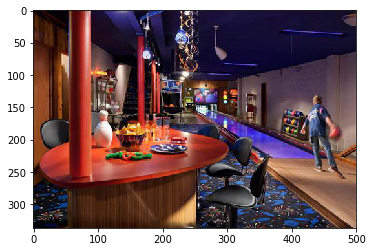

topwords of image:
会议室 0.615343|酒吧 0.60833|桌子 0.579347|店铺 0.564141|餐厅 0.555049|金蛋 0.553925|商店 0.549911|教室 0.539695|围坐在 0.532949|吧 0.526785|城里 0.521797|饭店 0.51431|店 0.505149|剧 0.498214|室 0.497572|房屋里 0.494941|宴会 0.494888|柜台 0.493569|接待 0.490819|大厅 0.485311|迷宫 0.478275|武术馆 0.477844|柔和 0.476902|橱窗 0.476572|展览馆 0.474563|会议厅 0.46985|桌上 0.468704|书桌上 0.46722|屋子里 0.463027|装修 0.46132|就餐 0.459831|姿 0.459712|椅子 0.454129|浏览 0.448258|电饭煲 0.446437|办理 0.445921|中年人 0.444721|诊脉 0.444687|内有 0.444411|室内 0.443507|房子 0.443354|办公室 0.441151|门口 0.440719|商场 0.440716|整齐 0.439317|附近 0.438433|宿舍 0.437237|凿冰 0.436145|入 0.434533|通道 0.431783|大气 0.430912|花店 0.430542|事情 0.430485|豪华 0.430186|杂货店 0.42939|卖场 0.429157|桌椅 0.428872|电源 0.428714|试 0.427776|台式 0.426289|生日 0.425693|罗 0.423668|背着手 0.423159|里 0.423152|模拟 0.422439|旁倒 0.420982|环境 0.420183|端茶 0.412034|光线 0.411595|桌边 0.410272|坐 0.406284|训 0.40542|体检 0.405204|吧台 0.403115|展品 0.402613|桌旁 0.40253|机里 0.400897|小吃摊 0.400737|油桶 0.399442|配 0.399082|摆放 0.399035|内站 0.398625|里试 

KeyboardInterrupt: 

In [4]:
while True:
  image_name = raw_input('image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ')
  image_name = image_name.strip().replace('file://', '')
  if image_name == 'q':
    break
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'

  image_path = os.path.join(image_dir, image_name)

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
      continue
        
  plt.subplot(1, 1, 1)
  image_show(image_path)

#   try:
#     hits = img2text[image_name]
#     texts = [text_strs[hit] for hit in hits]
#     for text in texts:
#       word_ids = text2ids.text2ids(text)
#       seg_text = text2ids.ids2text(word_ids, print_end=False)
#       print('label:', text, seg_text)
#       words_importance = predictor.words_importance([word_ids])
#       words_importance = words_importance[0]
#       for i in range(len(word_ids)):
#         if word_ids[i] == 0:
#           break 
#       print()
#   except Exception:
#     print(traceback.format_exc(), file=sys.stderr)    
#     pass

  image = melt.read_image(image_path)
  scores, word_ids = predictor.top_words([image], 200)
  scores = scores[0]
  word_ids = word_ids[0]
  print('topwords of image:')
  for word_id, score in zip(word_ids, scores):
    print(vocab.key(int(word_id)), score, end='|')


  while True:
    text = raw_input('text(q for exit): ')
    if text is 'q' or not text.strip():
      break
    print(text2ids.text2segtext(text))
    print('sim:', predictor.predict([image], [text2ids.text2ids(text)]))